In [ ]:
unzip /content/ROI.zip

NameError: ignored

In [ ]:
import cv2
import numpy as np
import pylab as pl
import os

#制作滤波器
def build_filters():
    filters = []
    # ksize = [7,9,11,13,15,17] #gabor尺度，6个
    ksize = [11]
    lamda = np.pi/1.0 #波长
    for theta in np.arange(0,np.pi,np.pi / 4): #gabor方向，0 45,90,135共四个
        for K in range(len(ksize)):
            kern = cv2.getGaborKernel((ksize[K],ksize[K]),1.0,theta,lamda,0.5,0,ktype=cv2.CV_32F)
            kern /= 1.2*kern.sum()
            filters.append(kern)
    print("np.arange(0,np.pi,np.pi / 4)",np.arange(0,np.pi,np.pi / 4))
    print("np.pi",np.pi)
    print("len",len(filters))
    return filters

def process(img,filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img,cv2.CV_8UC3,kern)
        np.maximum(accum,fimg,accum)
    return accum

#Gabor特征提取
def getGabor(img,filters):
    print('len(filters)',len(filters))
    res = [] #滤波结果
    for i in range(len(filters)):
        res1 = process(img,filters[i])
        res.append(np.asarray(res1))
    pl.figure(2)
    for temp in range(len(res)):
        pl.subplot(4,6,temp+1)
        pl.imshow(res[temp],cmap='gray')
    #pl.show()
    return res

#数据归一化
def normalization(data):
    return data / np.max(abs(data))
#提取特征并整合
def make_feature(filters):
    #用于存放当前类别标签(用外层循环i的值来表示)
    #y压缩标签列表添加到每张图片特征矩阵的最后一维即为扁平化处理
    class_list = []
    #将所有图片的特征向量进行堆叠,最后得到(500,16384)大小的特征矩阵
    #初始化为[[0]] --> 可以是任意值
    stack_metrix = np.array([[0]])
    count=0
    for i in range(0, 100):
        class_list.append(i)
        class_matrix = np.array(class_list, ndmin=2)
        for j in range(1, 7):
            path2 = path + 'P_{}_{}.bmp'.format(i, j)
            print(path2)
            x = cv2.imread(path)
            cv2.waitKey(0)
            x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
            x = cv2.adaptiveThreshold(x, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blocksize, C)
            # print(x)
            data=getGabor(x,filters)
            data = np.asarray(data)
            data=normalization(data)
            data = np.reshape(data, (1, -1))
            one_data = np.column_stack((data, class_matrix))
            print(one_data)
            count=count+1
            print('第{}次'.format(count))
            # 第一次不堆叠
            # np.save('ROI/p_{}_{}.npy'.format(i, j),one_data)
            if j<7:
                if i == 0 and j == 1:
                    stack_metrix = one_data
                    continue
                stack_metrix = np.row_stack((stack_metrix, one_data))
        class_list.pop()
    # np.savetxt('(new)feature.txt', stack_metrix)
    np.save('(new)feature.npy', stack_metrix)

if __name__ == '__main__':
        blocksize=25
        C=-2
        path = "/content/drive/MyDrive/plam/ROI/"  # 待读取的文件夹
        path_list = os.listdir(path)
        # print(path_list)
        path_list.sort()  # 对读取的路径进行排序
        # print(path_list)
        filters = build_filters()
        make_feature(filters)

np.arange(0,np.pi,np.pi / 4) [0.         0.78539816 1.57079633 2.35619449]
np.pi 3.141592653589793
len 4
/content/drive/MyDrive/plam/ROI/P_0_1.bmp


DisabledFunctionError: ignored

np.arange(0,np.pi,np.pi / 4) [0.         0.78539816 1.57079633 2.35619449]
np.pi 3.141592653589793
len 4
len(filters) 4
[[0.         0.         0.         ... 0.00784314 0.21568627 0.        ]]
第1次
len(filters) 4
[[0.         0.         0.         ... 0.05490196 0.05098039 0.        ]]
第2次
len(filters) 4
[[0.         0.         0.         ... 0.21176471 0.04705882 0.        ]]
第3次
len(filters) 4
[[0. 0. 0. ... 0. 0. 0.]]
第4次
len(filters) 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[[0. 0. 0. ... 0. 0. 0.]]
第5次
len(filters) 4
[[0.01176471 0.         0.01176471 ... 0.         0.         0.        ]]
第6次
len(filters) 4
[[0.         0.         0.         ... 0.57254902 0.6        1.        ]]
第7次
len(filters) 4
[[0.01176471 0.49411765 0.24313725 ... 0.31372549 0.18039216 1.        ]]
第8次
len(filters) 4
[[0.         0.50196078 0.24313725 ... 0.31372549 0.31372549 1.        ]]
第9次
len(filters) 4
[[0.         0.50196078 0.49411765 ... 0.31372549 0.31372549 1.        ]]
第10次
len(filters) 4
[[0.         0.         0.         ... 0.31372549 0.2        1.        ]]
第11次
len(filters) 4
[[0.16862745 0.15686275 0.         ... 0.2        0.31372549 1.        ]]
第12次
len(filters) 4
[[0.         0.         0.         ... 0.31372549 0.19215686 2.        ]]
第13次
len(filters) 4
[[0.49411765 0.         0.         ... 0.19215686 0.2        2.        ]]
第14次
len(filters) 4
[[0. 0. 0. ... 0. 0. 2.]]
第15次
len(filters) 4
[[0.         0.         0.50196078 ... 0.         0.         2.    

KeyboardInterrupt: ignored

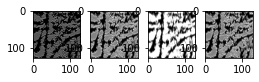

In [40]:
from tarfile import BLOCKSIZE
import cv2
import numpy as np
import pylab as pl
import os

#制作滤波器
def build_filters():
    filters = []
    # ksize = [7,9,11,13,15,17] #gabor尺度，6个
    ksize = [11] #gabor尺度，6个
    lamda = np.pi/1.0 #波长
    for theta in np.arange(0,np.pi,np.pi / 4): #gabor方向，0 45,90,135共四个
        for K in range(len(ksize)):
            kern = cv2.getGaborKernel((ksize[K],ksize[K]),1.0,theta,lamda,0.5,0,ktype=cv2.CV_32F)
            kern /= 1.2*kern.sum()
            filters.append(kern)
    print("np.arange(0,np.pi,np.pi / 4)",np.arange(0,np.pi,np.pi / 4))
    print("np.pi",np.pi)
    print("len",len(filters))
    return filters

def process(img,filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img,cv2.CV_8UC3,kern)
        np.maximum(accum,fimg,accum)
    return accum

#Gabor特征提取
def getGabor(img,filters):    
    print('len(filters)',len(filters))
    res = [] #滤波结果
    for i in range(len(filters)):
        res1 = process(img,filters[i])
        res.append(np.asarray(res1))
    pl.figure(2)
    for temp in range(len(res)):
        pl.subplot(4,6,temp+1)
        pl.imshow(res[temp],cmap='gray')
    #pl.show()
    return res

#数据归一化
def normalization(data):
    return data / np.max(abs(data))
#提取特征并整合
def make_feature(filters):
    #用于存放当前类别标签(用外层循环i的值来表示)
    #y压缩标签列表添加到每张图片特征矩阵的最后一维即为扁平化处理
    class_list = []
    #将所有图片的特征向量进行堆叠,最后得到(500,16384)大小的特征矩阵
    #初始化为[[0]] --> 可以是任意值
    stack_metrix = np.array([[0]])
    count=0
    for i in range(0, 102):
        class_list.append(i)
        class_matrix = np.array(class_list, ndmin=2)
        for j in range(1, 7):
            path = '/content/drive/MyDrive/plam/ROI/P_{}_{}.bmp'.format(i, j)
            x = cv2.imread(path)
            x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
            x = cv2.adaptiveThreshold(x, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blocksize, C)
            # cv2.imshow("x",x)
            cv2.waitKey(0)
            data=getGabor(x,filters)
            data = np.asarray(data)
            data=normalization(data)
            data = np.reshape(data, (1, -1))
            one_data = np.column_stack((data, class_matrix))
            print(one_data)
            count=count+1
            print('第{}次'.format(count))
            # 第一次不堆叠
            np.save('/content/drive/MyDrive/plam/ROI/P_{}_{}.npy'.format(i, j),one_data)
            if j<7:
                if i == 0 and j == 1:
                    stack_metrix = one_data
                    continue
                stack_metrix = np.row_stack((stack_metrix, one_data))
        class_list.pop()
    np.save('(new2)feature.npy', stack_metrix)

if __name__ == '__main__':
        blocksize=25
        C=-2
        path = "/content/drive/MyDrive/plam/ROI"  # 待读取的文件夹
        path_list = os.listdir(path)
        # #print(path_list)
        path_list.sort()  # 对读取的路径进行排序
        filters = build_filters()
        make_feature(filters)




np.arange(0,np.pi,np.pi / 4) [0.         0.78539816 1.57079633 2.35619449]
np.pi 3.141592653589793
len 4
len(filters) 4
[[0.         0.         0.         ... 0.00784314 0.21568627 0.        ]]
第1次
len(filters) 4
[[0.         0.         0.         ... 0.05490196 0.05098039 0.        ]]
第2次
len(filters) 4
[[0.         0.         0.         ... 0.21176471 0.04705882 0.        ]]
第3次
len(filters) 4
[[0. 0. 0. ... 0. 0. 0.]]
第4次
len(filters) 4
[[0. 0. 0. ... 0. 0. 0.]]
第5次
len(filters) 4
[[0.01176471 0.         0.01176471 ... 0.         0.         0.        ]]
第6次


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


len(filters) 4
[[0.         0.         0.         ... 0.57254902 0.6        1.        ]]
第7次
len(filters) 4
[[0.01176471 0.49411765 0.24313725 ... 0.31372549 0.18039216 1.        ]]
第8次
len(filters) 4
[[0.         0.50196078 0.24313725 ... 0.31372549 0.31372549 1.        ]]
第9次
len(filters) 4
[[0.         0.50196078 0.49411765 ... 0.31372549 0.31372549 1.        ]]
第10次
len(filters) 4
[[0.         0.         0.         ... 0.31372549 0.2        1.        ]]
第11次
len(filters) 4
[[0.16862745 0.15686275 0.         ... 0.2        0.31372549 1.        ]]
第12次
len(filters) 4
[[0.         0.         0.         ... 0.31372549 0.19215686 2.        ]]
第13次
len(filters) 4
[[0.49411765 0.         0.         ... 0.19215686 0.2        2.        ]]
第14次
len(filters) 4
[[0. 0. 0. ... 0. 0. 2.]]
第15次
len(filters) 4
[[0.         0.         0.50196078 ... 0.         0.         2.        ]]
第16次
len(filters) 4
[[0.         0.49411765 0.49411765 ... 0.         0.         2.        ]]
第17次
len(filters) 4
[[

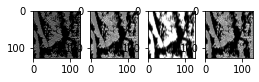

In [41]:
from tarfile import BLOCKSIZE
import cv2
import numpy as np
import pylab as pl
import os
import copy
from sklearn.decomposition import PCA
#制作滤波器
def build_filters():
    filters = []
    # ksize = [7,9,11,13,15,17] #gabor尺度，6个
    ksize = [11] #gabor尺度，6个
    lamda = np.pi/1.0 #波长
    for theta in np.arange(0,np.pi,np.pi / 4): #gabor方向，0 45,90,135共四个
        for K in range(len(ksize)):
            kern = cv2.getGaborKernel((ksize[K],ksize[K]),1.0,theta,lamda,0.5,0,ktype=cv2.CV_32F)
            kern /= 1.2*kern.sum()
            filters.append(kern)
    print("np.arange(0,np.pi,np.pi / 4)",np.arange(0,np.pi,np.pi / 4))
    print("np.pi",np.pi)
    print("len",len(filters))
    return filters

def process(img,filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img,cv2.CV_8UC3,kern)
        np.maximum(accum,fimg,accum)
    return accum

#Gabor特征提取
def getGabor(img,filters):    
    print('len(filters)',len(filters))
    res = [] #滤波结果
    for i in range(len(filters)):
        res1 = process(img,filters[i])
        res.append(np.asarray(res1))
    pl.figure(2)
    for temp in range(len(res)):
        pl.subplot(4,6,temp+1)
        pl.imshow(res[temp],cmap='gray')
    #pl.show()
    return res

#数据归一化
def normalization(data):
    return data / np.max(abs(data))
#提取特征并整合
def make_feature(filters):
    pca = PCA(n_components=25)
    #用于存放当前类别标签(用外层循环i的值来表示)
    #y压缩标签列表添加到每张图片特征矩阵的最后一维即为扁平化处理
    class_list = []
    #将所有图片的特征向量进行堆叠,最后得到(500,16384)大小的特征矩阵
    #初始化为[[0]] --> 可以是任意值
    stack_metrix = np.array([[0]])
    count=0
    for i in range(0, 102):
        class_list.append(i)
        class_matrix = np.array(class_list, ndmin=2)
        for j in range(1, 7):
            path = '/content/drive/MyDrive/plam/ROI/P_{}_{}.bmp'.format(i, j)
            x = cv2.imread(path)
            x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
            x = cv2.adaptiveThreshold(x, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blocksize, C)
            # cv2.imshow("x",x)
            cv2.waitKey(0)
            data=getGabor(x,filters)
            data = np.asarray(data)
            data=normalization(data)
            # print(dat.shape)
            # data = []
            # for jj in range(0,len(dat)):
            #     pca.fit(dat[jj])
            #     data.append(pca.transform(dat[jj]))
            data = np.reshape(data, (1, -1))
            one_data = np.column_stack((data, class_matrix))

            print(one_data)
            count=count+1
            print('第{}次'.format(count))
            # 第一次不堆叠
            np.save('/content/drive/MyDrive/plam/ROI/P_{}_{}.npy'.format(i, j),one_data)
            if j<7:
                if i == 0 and j == 1:
                    stack_metrix = one_data
                    continue
                stack_metrix = np.row_stack((stack_metrix, one_data))
        class_list.pop()
    np.save('(new3)feature.npy', stack_metrix)

if __name__ == '__main__':
        blocksize=25
        C=-2
        path = "/content/drive/MyDrive/plam/ROI"  # 待读取的文件夹
        path_list = os.listdir(path)
        # #print(path_list)
        path_list.sort()  # 对读取的路径进行排序
        filters = build_filters()
        make_feature(filters)




In [39]:
cp "(new3)feature.npy" /content/drive/MyDrive/plam/

(606, 65537)
pca_num=5
svm测试集上的预测精度为:0.8613861386138614
knn测试集上的预测精度为:0.8118811881188119
pca_num=5
(606, 65537)
pca_num=8
svm测试集上的预测精度为:0.9405940594059405
knn测试集上的预测精度为:0.8811881188118812
pca_num=8
(606, 65537)
pca_num=11
svm测试集上的预测精度为:0.9603960396039604
knn测试集上的预测精度为:0.9405940594059405
pca_num=11
(606, 65537)
pca_num=14
svm测试集上的预测精度为:0.9702970297029703
knn测试集上的预测精度为:0.9603960396039604
pca_num=14
(606, 65537)
pca_num=17
svm测试集上的预测精度为:0.9900990099009901
knn测试集上的预测精度为:0.9801980198019802
pca_num=17
(606, 65537)
pca_num=20
svm测试集上的预测精度为:0.9900990099009901
knn测试集上的预测精度为:0.9900990099009901
pca_num=20
(606, 65537)
pca_num=23
svm测试集上的预测精度为:1.0
knn测试集上的预测精度为:0.9900990099009901
pca_num=23


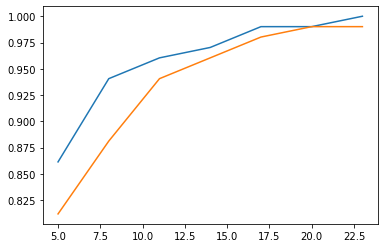

In [ ]:


N = 1179649
N = 19660*2

def load_data():
    """
    获取样本的特征以及类别标签
    """
    # path = '(new)feature.txt'
    # train_data = np.loadtxt(path)
    path = '/content/(new)feature.npy'
    train_data = np.load(path)
    data = train_data[:, :N]
    target = train_data[:, -1:]
    # print(train_data)
    print(train_data.shape)
    return data, target

def load_test(i,j):
    """
    获取测试图片的特征以及类别标签
    """

    path = '/content/drive/MyDrive/plam/ROI/P_{}_{}.npy'.format(i, j)
    test_data = np.load(path)
    data = test_data[:, :N]
    target = test_data[:, -1:]

    return data, target

def train(i):
    # """
    # 1.PCA+SVM进行分类 or PCA+KNN
    # 2.PCA降维至i维
    # :return:
    # """
    data, target = load_data()
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1666666666666666666666666667, random_state=10)
    # #i随机划分数据集
    

    pca_train.append("pca降至{:.0f}维".format(i))
    pca = PCA(n_components=i)#导入PCA，并通过更改PCA的降维维度数来实现模型的自动化
    x_train = pca.fit_transform(x_train)
    svm_clf = SVC(C=100)#设置SVM的惩罚参数C为100，有监督学习使其分类更加准确
    svm_clf.fit(x_train, y_train.ravel())
    my_model = KNeighborsClassifier(algorithm='kd_tree', p=5, n_neighbors=1)
    my_model.fit(x_train, y_train.ravel())

    joblib.dump(my_model, 'pca_num={}_train_model.m'.format(i))
    my_model = joblib.load('pca_num={}_train_model.m'.format(i))
    joblib.dump(svm_clf, 'pca_num={}_train_svm_clf.m'.format(i))
    svm_clf = joblib.load('pca_num={}_train_svm_clf.m'.format(i))
    
    x_test_process = pca.transform(x_test)
    svm_score = svm_clf.score(x_test_process, y_test)
    knn_score = my_model.score(x_test_process,y_test)
    print("pca_num={}".format(i))
    print('svm测试集上的预测精度为:{}'.format(svm_score))
    print('knn测试集上的预测精度为:{}'.format(knn_score))
    accuracy_svm.append(svm_score)
    accuracy_knn.append(knn_score)

    print("pca_num={}".format(i))
    # print(np.array([x_test[0]])[0],len(np.array([x_test[0]])[0]),len(x_test))
    # print(load_test(67,6)[0],len(load_test(67,6)[0]))


if __name__ == '__main__':
    k=0
    # pca_num=[10,20,30,40,48,50,51,52,55,60,65]
    pca_num = [15]
    pca_num = range(5,25,3)

    accuracy_svm = []
    accuracy_knn = []
    pca_train=[]
    for i in pca_num:
        train(i)
    if len(accuracy_svm)>1:
        plt.plot(pca_num,accuracy_svm)
        plt.plot(pca_num,accuracy_knn)
        plt.show()

In [ ]:
pip install pyecharts

     |████████████████████████████████| 135 kB 5.4 MB/s 
     |████████████████████████████████| 130 kB 51.5 MB/s 


ModuleNotFoundError: ignored

ModuleNotFoundError: ignored